In [ ]:
# 1. Mount Google Drive to access your model
from google.colab import drive
drive.mount('/content/drive')

# 2. Import necessary libraries
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 3. Define class labels and recyclable categories
class_labels = {0: 'cardboard', 1: 'glass', 2: 'metal', 3: 'paper', 4: 'plastic', 5: 'trash'}
recyclable_classes = {'cardboard', 'glass', 'metal', 'paper', 'plastic'}

# 4. Function to preprocess an input image
def preprocess_image(img_path, target_size):
    """
    Preprocess the input image before feeding it into the model.

    Parameters:
    - img_path: str, Path to the image file
    - target_size: tuple, The target size for resizing the image

    Returns:
    - np.array: Preprocessed image array with an additional batch dimension.
    """
    if not os.path.exists(img_path):
        raise FileNotFoundError(f"The image at {img_path} was not found.")

    img = image.load_img(img_path, target_size=target_size)  # Load image and resize
    img_array = image.img_to_array(img)  # Convert image to numpy array
    img_array = img_array / 255.0  # Normalize to [0, 1] scale
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    return img_array

# 5. Function to classify an image
def classify_image(model, img_path, class_labels, recyclable_classes):
    """
    Classifies the image into a label and category.

    Parameters:
    - model: The pretrained Keras model.
    - img_path: str, The path to the image file.
    - class_labels: dict, Mapping of class indices to labels.
    - recyclable_classes: set, Set of recyclable categories.

    Returns:
    - tuple: Predicted label, Category (Recyclable/Non-Recyclable)
    """
    input_shape = model.input_shape[1:3]
    img_array = preprocess_image(img_path, target_size=input_shape)

    # Make prediction
    predictions = model.predict(img_array)
    predicted_class_index = np.argmax(predictions)
    predicted_label = class_labels[predicted_class_index]

    # Determine if it's recyclable or not
    category = 'Recyclable' if predicted_label in recyclable_classes else 'Non-Recyclable'

    return predicted_label, category

# 6. Function to load the model and classify the image
def load_and_predict(img_path, model_path, class_labels, recyclable_classes):
    """
    Load a model from the given path, and classify an image.

    Parameters:
    - img_path: str, Path to the image file to classify.
    - model_path: str, Path to the saved Keras model.
    - class_labels: dict, Class labels (index -> label).
    - recyclable_classes: set, Recyclable categories.

    Returns:
    - tuple: Predicted label and category.
    """
    # Load the model
    model = load_model(model_path)

    # Classify the image
    predicted_label, category = classify_image(model, img_path, class_labels, recyclable_classes)

    return predicted_label, category

# 7. Example usage of the functions:
# Set the path to your model
model_path = '/content/drive/My Drive/Saved_models/adam_cnn.keras'

# Path to an image you want to classify (example image path)
image_path = '/content/drive/My Drive/Garbage_classification/trash/trash8.jpg'

# Predict using the full pipeline
predicted_label, category = load_and_predict(image_path, model_path, class_labels, recyclable_classes)

# Output results
print(f"Predicted Label: {predicted_label}")
print(f"Category: {category}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
Predicted Label: trash
Category: Non-Recyclable


Found 2527 images belonging to 6 classes.
79/79 ━━━━━━━━━━━━━━━━━━━━ 929s 12s/step

Classification Report:
              precision    recall  f1-score   support

   cardboard       0.90      0.89      0.89       403
       glass       0.76      0.75      0.76       501
       metal       0.76      0.72      0.74       410
       paper       0.81      0.93      0.87       594
     plastic       0.75      0.70      0.72       482
       trash       0.75      0.65      0.70       137

    accuracy                           0.80      2527
   macro avg       0.79      0.77      0.78      2527
weighted avg       0.79      0.80      0.79      2527



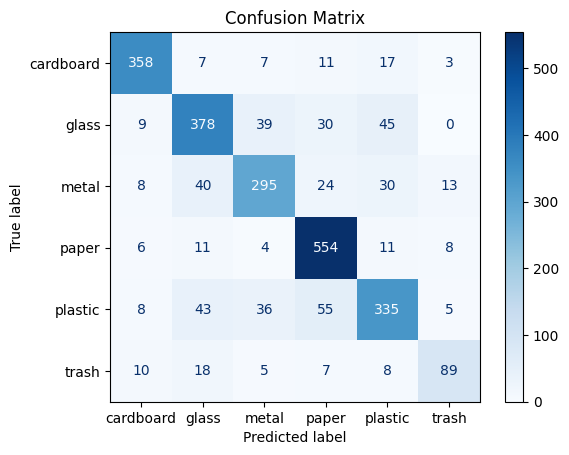

In [ ]:
# 8. Evaluate the model on dataset
def evaluate_model(model_path, test_data_dir, class_labels):
    """
    Evaluate the pre-trained model using a test dataset and print metrics.

    Parameters:
    - model_path: str, Path to the saved Keras model.
    - test_data_dir: str, Path to the directory containing the test dataset.
    - class_labels: dict, Mapping of class indices to labels.
    """
    # Load the model
    model = load_model(model_path)

    # Data generator for test set
    input_shape = model.input_shape[1:3]
    test_datagen = ImageDataGenerator(rescale=1./255)  # Normalize test images
    test_generator = test_datagen.flow_from_directory(
        test_data_dir,
        target_size=input_shape,
        batch_size=32,
        class_mode='categorical',
        shuffle=False
    )

    # Predict on test set
    predictions = model.predict(test_generator)
    y_pred = np.argmax(predictions, axis=1)
    y_true = test_generator.classes

    # Classification report
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred, target_names=list(class_labels.values())))

    # Confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(class_labels.values()))
    disp.plot(cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.show()


# Path to dataset directory
test_data_dir = '/content/drive/My Drive/Garbage_classification_data'

# Evaluate the model
evaluate_model(model_path, test_data_dir, class_labels)
